In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import json
import plotly.express as px

In [2]:
# read the dataset
df = pd.read_csv('datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# drop unnecessary columns
df.drop(['show_id', 'date_added', 'cast', 'description'], axis = 'columns', inplace = True)

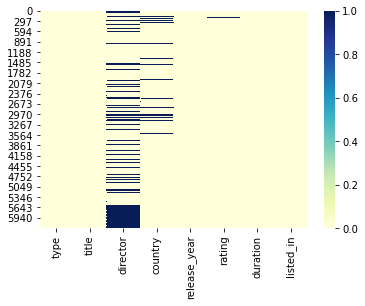

In [4]:
# heatmap visualization of the missing values
a = df.isnull()
sns.heatmap(a, cmap='YlGnBu');

In [5]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [6]:
df['country'].value_counts()

United States                                 2032
India                                          777
United Kingdom                                 348
Japan                                          176
Canada                                         141
                                              ... 
Saudi Arabia                                     1
Pakistan, United States                          1
United States, Greece, Brazil                    1
United States, India, United Arab Emirates       1
Cambodia, United States                          1
Name: country, Length: 554, dtype: int64

In [7]:
# replacing the missing values with the highest one
df['country'].replace(np.nan, 'United States', inplace = True)
df['rating'].replace(np.nan, 'TV-MA', inplace= True)

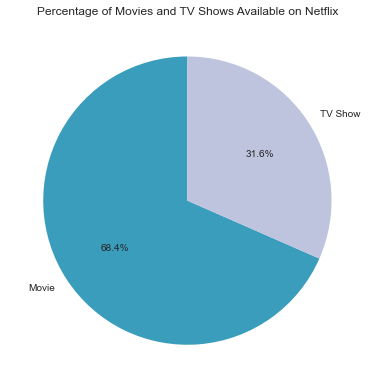

In [8]:
# vizualizing Percentage of Movies and TV Shows
plt.style.use('seaborn')

plt.pie(df['type'].value_counts(), colors= ['#3a9dbc', '#bec3de'], labels = ['Movie', 'TV Show'],  autopct='%1.1f%%',
        startangle=90);

plt.title('Percentage of Movies and TV Shows Available on Netflix')
plt.tight_layout();

In [9]:
rating_dict = df['rating'].value_counts().to_dict()

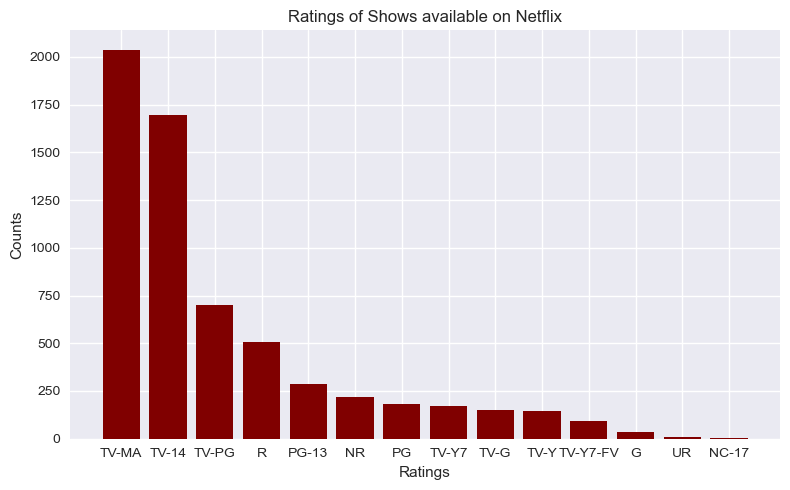

In [10]:
# vizualizing Ratings of Shows
x = [i for i in rating_dict]
y =[ rating_dict[i] for i in rating_dict ]

plt.figure(figsize=(8,5), dpi=100)

plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Ratings of Shows available on Netflix')

plt.bar(x,y, color='#800000');

plt.tight_layout();

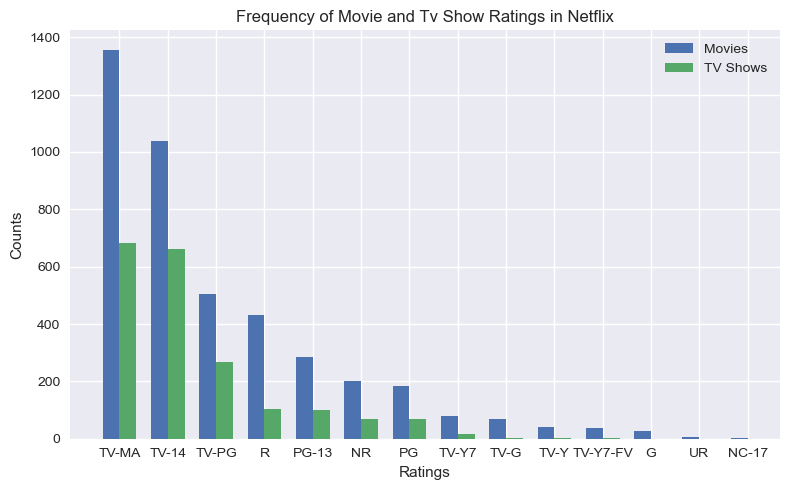

In [11]:
# vizualizing Frequency of Movie and Tv Show Ratings
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

bwid = 0.35

x = [i for i in rating_dict]
my = [i for i in df.loc[ df['type'] == 'Movie' ]['rating'].value_counts()]

ax.bar(np.arange(len(x)) - bwid/2, my, bwid, label='Movies');

tx = [ i for i in df.loc[ df['type'] == 'TV Show' ]['rating'].value_counts().sort_values(ascending=False).index.unique() ]
ty = [ i for i in df.loc[ df['type'] == 'TV Show' ]['rating'].value_counts()]

ax.bar(np.arange(len(tx)) + bwid/2, ty, bwid, label='TV Shows');

ax.set_title('Frequency of Movie and Tv Show Ratings in Netflix')
ax.set_xlabel('Ratings')
ax.set_ylabel('Counts')
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x);



ax.legend();
fig.tight_layout();


In [12]:
# turning the values of country columns to lists
df['country'] = df['country'].str.split(', ')

uniq_countries = []

for i in df['country']: 
    for j in i:
        if j not in uniq_countries:
            uniq_countries.append(j)
        

In [14]:
total_countries = []
for i in df['country']:
    for j in i:
        total_countries.append(j)
        
country_dict = {}

# extracting the countries from column
for i in uniq_countries:
    c_dict = {}
    c_dict[i] = total_countries.count(i)
    country_dict.update(c_dict)
  

In [15]:
sorted_country_dict = dict( sorted(country_dict.items(), key=operator.itemgetter(1),reverse=True))

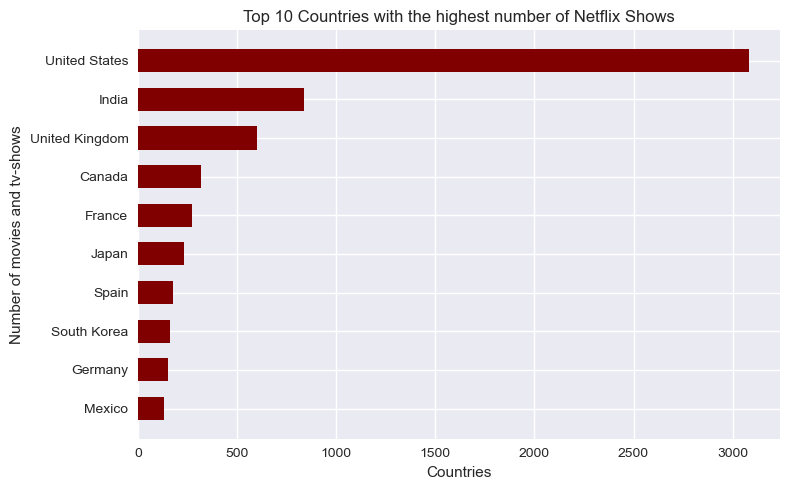

In [16]:
# vizualizing Top 10 Countries with the highest number of Netflix Shows
x = [i for i in sorted_country_dict][:10]
y = [country_dict[i] for i in sorted_country_dict ][:10]

fig, ax = plt.subplots(figsize=(8,5), dpi=100)


ax.set_xlabel('Countries')
ax.set_ylabel('Number of movies and tv-shows')
ax.set_title('Top 10 Countries with the highest number of Netflix Shows')

ax.barh(x,y, color='#800000', height=0.6);
ax.invert_yaxis();

fig.tight_layout();

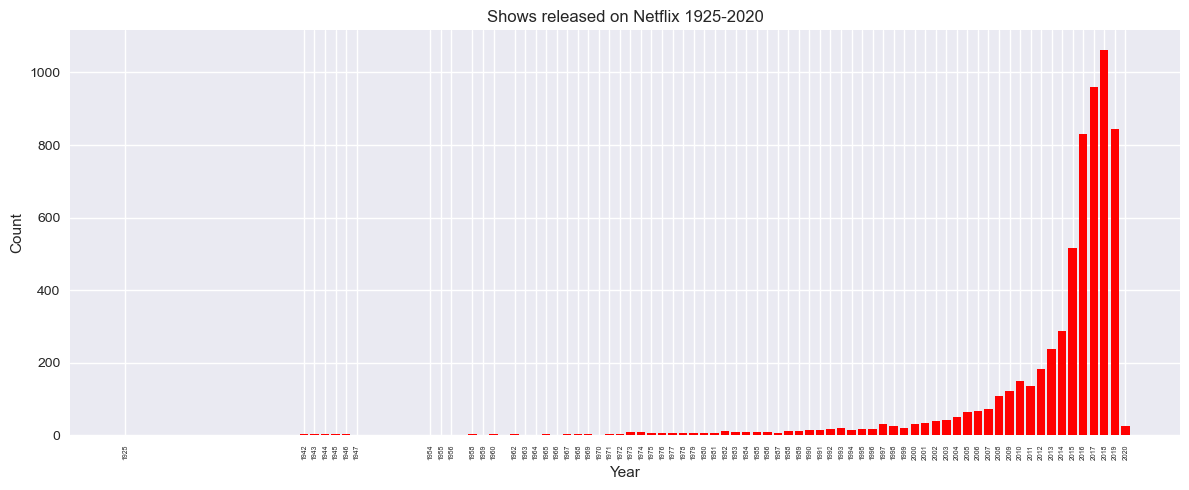

In [17]:
# vizualizing Shows released on Netflix 1925-2020
x = [i for i in sorted(df['release_year'].unique()) ]
y = [i for i in df['release_year'].value_counts().sort_index() ]

plt.figure(figsize=(12,5), dpi=100)
plt.bar(x,y, color = 'r');

plt.title('Shows released on Netflix 1925-2020');
plt.xticks(x, rotation = 90, fontsize=5);
plt.xlabel('Year');
plt.ylabel('Count');

plt.tight_layout();

plt.show();


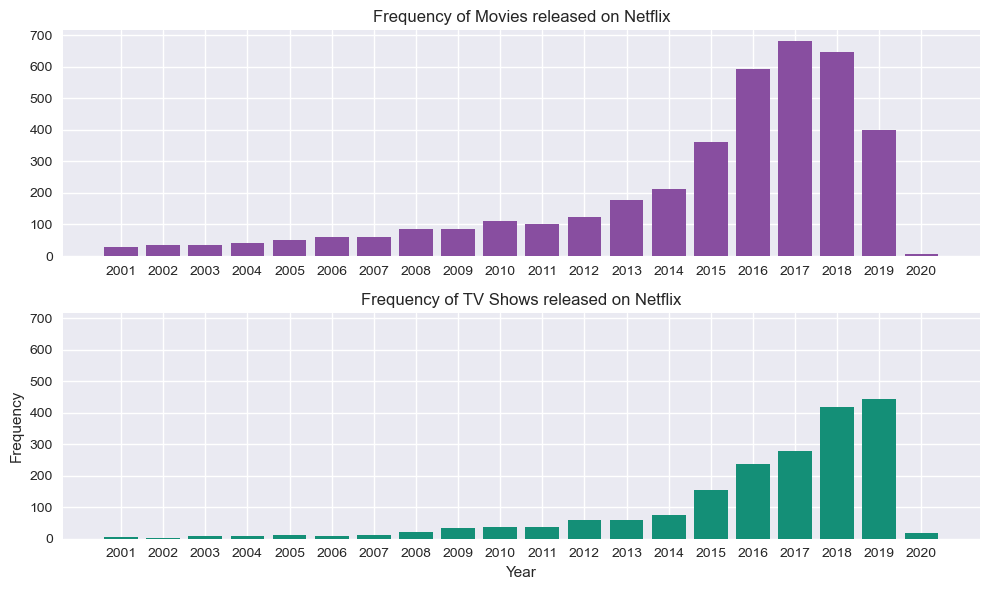

In [18]:
# vizualizing Frequency of TV Shows
fig, ax = plt.subplots(2, 1, sharey = True, figsize = (10,6), dpi=100)

mx = [ i for i in sorted( df.loc[ df['type'].str.contains("Movie") ]['release_year'].unique() )[-20:] ]
my = [ i for i in df.loc[ df['type'].str.contains("Movie") ]['release_year'].value_counts().sort_index()[-20:] ]

ax[0].bar(mx, my, color='#884EA0');
ax[0].set_title('Frequency of Movies released on Netflix')
ax[0].set_xticks(mx)

tx = [ i for i in sorted( df.loc[ df['type'].str.contains("TV Show") ]['release_year'].unique() )[-20:] ]
ty = [ i for i in df.loc[ df['type'].str.contains("TV Show") ]['release_year'].value_counts().sort_index()[-20:] ]

ax[1].bar(tx, ty, color='#148F77');
ax[1].set_title('Frequency of TV Shows released on Netflix')
ax[1].set_xticks(tx)

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Frequency')

fig.tight_layout();

In [19]:
# oldest shows available netflix
old_shows_df = df.sort_values('release_year')
old_shows_df = old_shows_df[['title', 'type', 'release_year']][:20]
old_shows_df

,title,type,release_year
4292,Pioneers: First Women Filmmakers*,TV Show,1925
2011,Prelude to War,Movie,1942
2013,The Battle of Midway,Movie,1942
2022,Undercover: How to Operate Behind Enemy Lines,Movie,1943
2023,Why We Fight: The Battle of Russia,Movie,1943
2026,WWII: Report from the Aleutians,Movie,1943
2017,The Memphis Belle: A Story of a\nFlying Fortress,Movie,1944
2019,The Negro Soldier,Movie,1944
2021,Tunisian Victory,Movie,1944
2012,San Pietro,Movie,1945


In [20]:
# documentaries availabele in netflix
documentary_df = df[ df['listed_in'].str.contains('Documentaries') ]
documentary_df = documentary_df[[ 'title', 'director','release_year' ]]
documentary_df.head()


,title,director,release_year
22,Rolling Papers,Mitch Dickman,2015
27,City of Joy,Madeleine Gavin,2018
43,Elstree 1976,Jon Spira,2015
44,American Factory: A Conversation with the Obamas,NaN,2019
73,Amanda Knox,"Rod Blackhurst, Brian McGinn",2016


In [21]:
# kids shows available on netflix
kidshow_df = df[ df['listed_in'].str.contains("Kids' TV") ]
kidshow_df = kidshow_df[[ 'title','release_year' ]]
kidshow_df.head()

,title,release_year
2,Transformers Prime,2013
3,Transformers: Robots in Disguise,2016
34,Archibald's Next Big Thing,2019
64,Ben 10,2016
70,We Bare Bears,2017


In [22]:
df['listed_in'] = df['listed_in'].str.split(', ')

In [23]:
# extracting all genres from column
genre_list = []

for i in df['listed_in']: 
    for j in i:
        if j not in genre_list:
            genre_list.append(j)
  

all_genre = []

for i in df['listed_in']:
    for j in i:
        all_genre.append(j) 

In [24]:
genre_dict = {}


for i in genre_list:
    g_dict = {}
    g_dict[i]  = all_genre.count(i)
    genre_dict.update(g_dict)

In [25]:
sorted_genre_dict = dict( sorted(genre_dict.items(), key=operator.itemgetter(1), reverse=True))

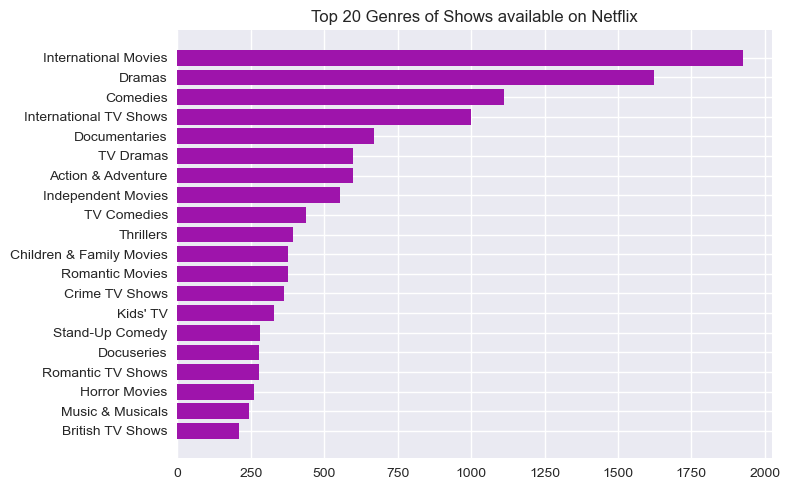

In [26]:
# vizualizing Top 20 Genres
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

x = [ i for i in sorted_genre_dict ][:20]
y = [ genre_dict[i] for i in sorted_genre_dict ][:20]

ax.barh(x, y, color='#9E14AB');

ax.set_title('Top 20 Genres of Shows available on Netflix')

ax.invert_yaxis();
fig.tight_layout();

In [27]:
# extracting all genres of Movies
m_all_genre = []

for i in df.loc[ df['type'] == 'Movie' ]['listed_in']:
    for j in i:
        m_all_genre.append(j)
        
t_all_genre = []

for i in df.loc[ df['type'] == 'TV Show' ]['listed_in']:
    for j in i:
        t_all_genre.append(j)

In [28]:
mgenre_dict = {}

for i in genre_list:
    mg_dict = {}
    mg_dict[i]  = m_all_genre.count(i)
    mgenre_dict.update(mg_dict)
 
 # extracting all genres of TV Shows
tgenre_dict = {}

for i in genre_list:
    tg_dict = {}
    tg_dict[i]  = t_all_genre.count(i)
    tgenre_dict.update(tg_dict)

In [29]:
sorted_mgenre_dict = dict( sorted(mgenre_dict.items(), key=operator.itemgetter(1), reverse=True))
sorted_tgenre_dict = dict( sorted(tgenre_dict.items(), key=operator.itemgetter(1), reverse=True))

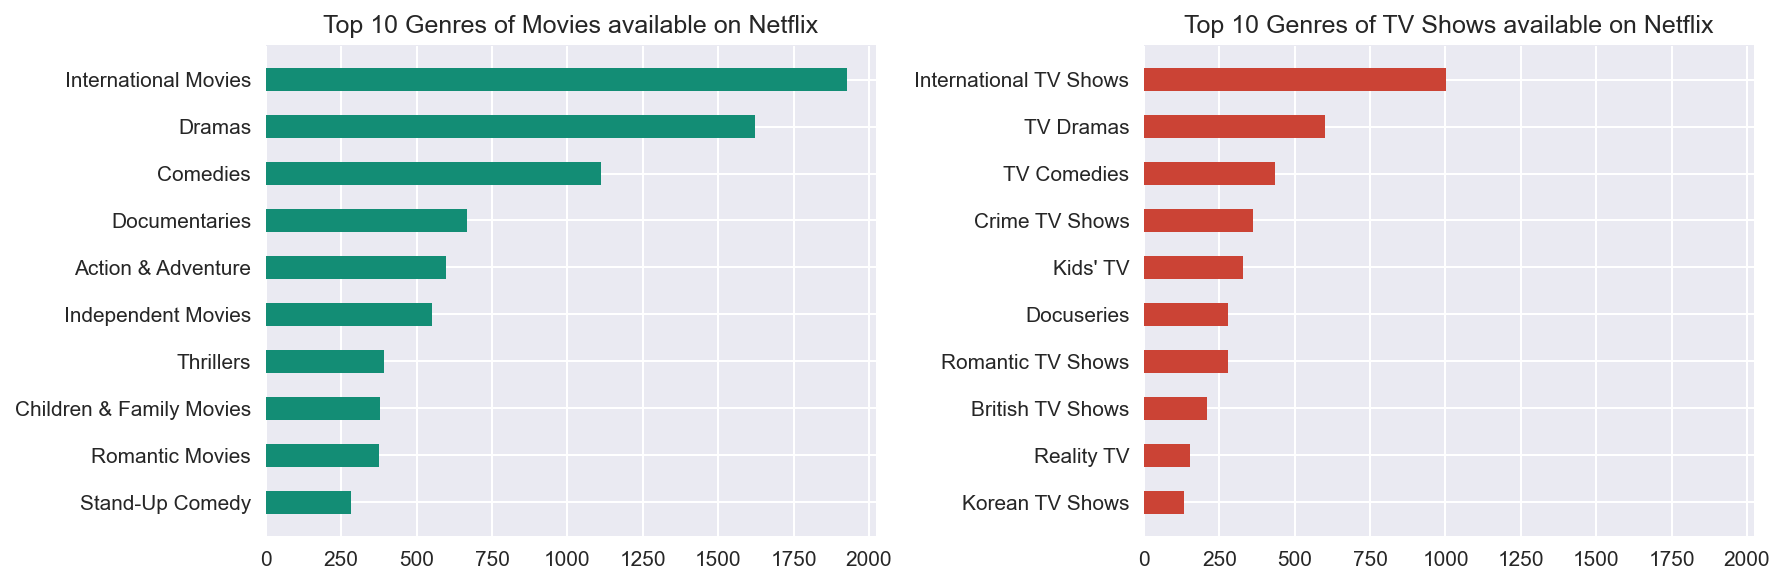

In [30]:
# vizualizing Top 10 Genres of Movies & TV Shows
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,4), dpi = 150)

mx = [ i for i in sorted_mgenre_dict ][:10]
my = [ mgenre_dict[i] for i in sorted_mgenre_dict ][:10]

ax.flat[0].barh(mx, my, height=0.5, color='#138D75');
ax.flat[0].set_title('Top 10 Genres of Movies available on Netflix')

tx = [ i for i in sorted_tgenre_dict ][:10]
ty = [ tgenre_dict[i] for i in sorted_tgenre_dict ][:10]

ax.flat[1].barh(tx, ty, height=0.5, color='#CB4335');
ax.flat[1].set_title('Top 10 Genres of TV Shows available on Netflix')

ax[0].invert_yaxis();
ax[1].invert_yaxis();
fig.tight_layout();

In [33]:
# reading worldmap geojson file
world_map = json.load(open('countries.geojson', 'r'))

In [34]:
world_map['features'][1].keys()

dict_keys(['type', 'properties', 'geometry'])

In [37]:
country_id_map = {}

for feature in world_map['features']:
    feature['id'] = feature['properties']['ISO_A3']
    country_id_map[feature['properties']['ADMIN']] = feature['id']

In [38]:
a = {
    'United States' : 'USA',
    'Hong Kong' : 'HKG',
    'Serbia' : 'SRB',
    'West Germany': 'DEU',
    'Soviet Union' : 'RUS',
    'United States,' : 'VIR',
    'Poland,' : 'POL',
    'United Kingdom,' : 'DJ',
    'Vatican City' : 'VAC',
    'East Germany' : 'EDEU,'
              }
country_id_map.update(a)

In [39]:
country_df = pd.DataFrame(list(sorted_country_dict.items()), columns = ['Country', 'Counts'])
country_df['id'] = country_df['Country'].apply(lambda x: country_id_map[x])

In [41]:
# vizualizing geomap of no. of shows of all countries
# fig = px.choropleth_mapbox(country_df, locations='id', geojson=world_map, color = 'Counts',
#                    hover_name='Country',
#                           mapbox_style='carto-positron',
#                            center={'lat': 30, 'lon': 0},
#                           zoom=1,
#                           opacity=0.7 )

# fig.update_geos(fitbounds='locations')
# fig.show()